# TP 2 Multitâches 
# Exercice 2 - Facteurs de nombres entiers

## Introduction

Cet exercice nécessite le package **Numba**. 

L'objectif est de paralléliser un algorithme par **multiprocessing** et **multithreading** à l'aide du module Python **concurrent.futures** et de comparer les performances obtenues.

In [1]:
import numpy as np
from numba import njit
import time
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

La fonction `factor_01(n)` construit de façon naïve par compréhension la liste des différents facteurs entiers de `n` strictement inférieur à `n`.

In [2]:
def factor_01(n):
    """
    Retourner la liste des facteurs propres d'un entier n.
    """
    return [i for i in range(1, n) if n % i == 0]

La fonction `main(a, b)` construit par compréhension la liste de la somme de tous les facteurs de chaque nombre entier `n` compris entre `a` et `b` donnés en arguments du script.

In [3]:
def main(a, b):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b.
    """
    return [sum(factor_01(n)) for n in range(a, b + 1)]

## 1 - Préliminaires

1.a) Mesurer les temps d'exécution de `main` pour différentes valeurs de `a` et `b`

For 100 numbers, compute in 0.0011069774627685547 seconds
For 200 numbers, compute in 0.0010142326354980469 seconds
For 500 numbers, compute in 0.006045341491699219 seconds
For 1000 numbers, compute in 0.030878067016601562 seconds
For 2000 numbers, compute in 0.13564491271972656 seconds
For 2500 numbers, compute in 0.21155881881713867 seconds
For 5000 numbers, compute in 0.8682339191436768 seconds
For 7500 numbers, compute in 1.997779130935669 seconds
For 10000 numbers, compute in 3.7384254932403564 seconds


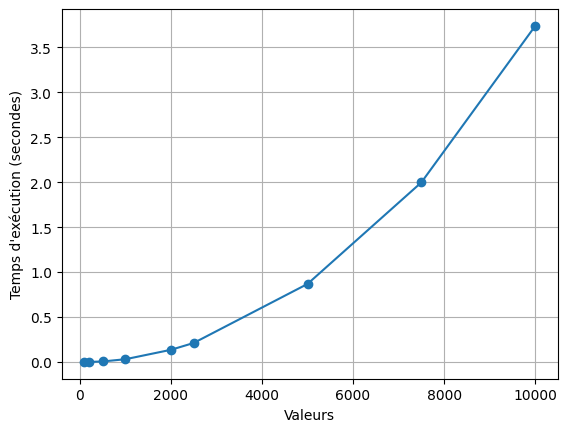

In [5]:
b_values = [100, 200 , 500, 1000, 2000, 2500, 5000, 7500, 10000]

times = []

for i in range(len(b_values)):
    tic = time.time()
    mains = main(1, b_values[i])
    toc = time.time()
    elapsed_time = toc - tic 
    times.append(elapsed_time) 
    print(f'For {len(mains)} numbers, compute in {toc - tic} seconds')

plt.plot(b_values, times, marker='o')
plt.xlabel('Valeurs')
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()

1.b) Sur la base de `main`, écrire une fonction `main_map` afin d'utiliser la méthode `map` native de Python

In [6]:
def main_map(a, b):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b en utilisant map.
    """
    return list(map(lambda n: sum(factor_01(n)), range(a, b + 1)))


1.c) Mesurer les performances de cette nouvelle version

For 100 numbers, compute in 0.0009849071502685547 seconds
For 200 numbers, compute in 0.001016378402709961 seconds
For 500 numbers, compute in 0.00589299201965332 seconds
For 1000 numbers, compute in 0.028493165969848633 seconds
For 2000 numbers, compute in 0.13398313522338867 seconds
For 2500 numbers, compute in 0.2050485610961914 seconds
For 5000 numbers, compute in 0.8742532730102539 seconds
For 7500 numbers, compute in 2.0189571380615234 seconds
For 10000 numbers, compute in 3.606520414352417 seconds


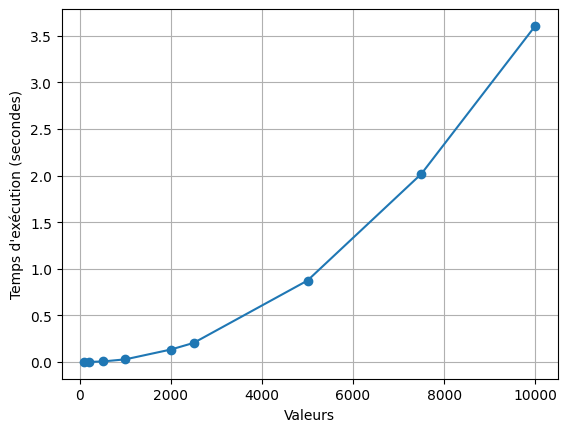

In [7]:
times = []

for i in range(len(b_values)):
    tic = time.time()
    mains = main_map(1, b_values[i])
    toc = time.time()
    elapsed_time = toc - tic 
    times.append(elapsed_time) 
    print(f'For {len(mains)} numbers, compute in {toc - tic} seconds')

plt.plot(b_values, times, marker='o')
plt.xlabel('Valeurs')
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()

## 2 - Multiprocessing

2.a) Sur la base de `main_map`, écrire une fonction `main_mp` qui dispatche les tâches effectuées par le `map` entre les différents processus d’un pool de `n` processus, `n` donné en argument de la fonction `main_mp`

In [30]:
def sum_factors(n):
    """
    Fonction auxiliaire pour calculer la somme des facteurs propres d'un nombre n.
    """
    return sum(factor_01(n))

def main_mp(a, b, n):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b en distribuant les tâches sur n processus.
    """
    p_exe = ProcessPoolExecutor(max_workers=n)
    return list(p_exe.map(sum_factors, range(a, b + 1)))

# def main_mp(a, b, n):
#     """
#     Construire la liste des sommes des facteurs propres pour tous les entiers de a à b en distribuant les tâches sur n processus.
#     """
#     with ProcessPoolExecutor(max_workers=n) as executor:
#         return list(executor.map(lambda n: sum(factor_01(n)), range(a, b + 1)))

Error with 2 processes and b=100: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 2 processes and b=200: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 2 processes and b=500: A process in the process pool was terminated abruptly while the future was running or pending.


Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 184, in send_bytes
    self._check_closed()
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 137, in _check_closed
    raise OSError("handle is closed")
OSError: handle is closed
Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 184, in send_bytes
    self._check_closed()
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 137, in _check_closed
    raise OSError("handle is closed")
OSError: handle is closed
Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anac

Error with 2 processes and b=1000: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 2 processes and b=2000: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 2 processes and b=2500: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 2 processes and b=5000: A process in the process pool was terminated abruptly while the future was running or pending.


Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 184, in send_bytes
    self._check_closed()
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 137, in _check_closed
    raise OSError("handle is closed")
OSError: handle is closed


Error with 2 processes and b=7500: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 2 processes and b=10000: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 5 processes and b=100: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 5 processes and b=200: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 5 processes and b=500: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 5 processes and b=1000: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 5 processes and b=2000: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 5 processes and b=2500: A process in the process pool was terminated abruptly whi

Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 289, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [WinError 6] Identificador inválido
Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 184, in send_bytes
    self._check_closed()
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 137, in _check_closed
    raise OSError("handle is closed")
OSError: handle is closed
Traceback (most recent call la

Error with 5 processes and b=5000: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 5 processes and b=7500: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 5 processes and b=10000: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 10 processes and b=100: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 10 processes and b=200: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 10 processes and b=500: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 10 processes and b=1000: A process in the process pool was terminated abruptly while the future was running or pending.
Error with 10 processes and b=2000: A process in the process pool was terminated abruptl

Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 184, in send_bytes
    self._check_closed()
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 137, in _check_closed
    raise OSError("handle is closed")
OSError: handle is closed
Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 184, in send_bytes
    self._check_closed()
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\connection.py", line 137, in _check_closed
    raise OSError("handle is closed")
OSError: handle is closed
Traceback (most recent call last):
  File "c:\Users\ferna\anaconda3\Lib\multiprocessing\queues.py", line 266, in _feed
    send_bytes(obj)
  File "c:\Users\ferna\anac

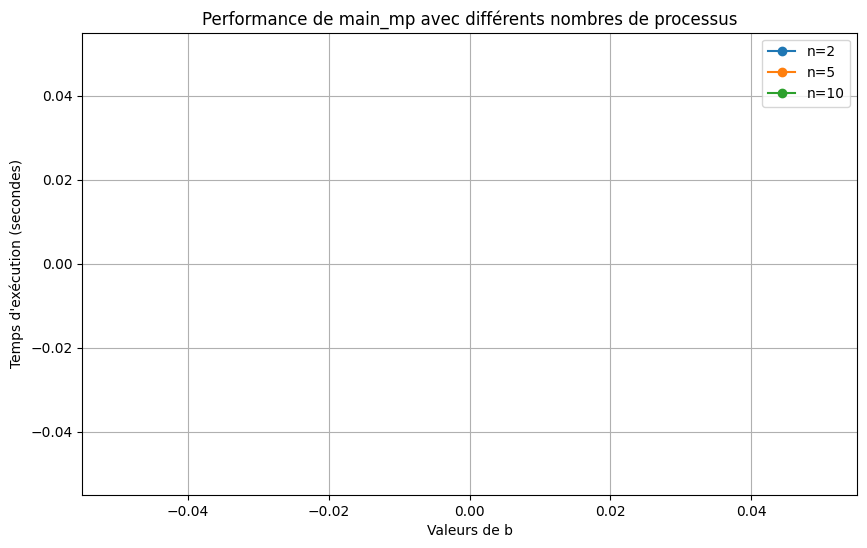

In [38]:
import time
import concurrent.futures
import matplotlib.pyplot as plt

def factor_01(n):
    """
    Retourner la liste des facteurs propres d'un entier n.
    """
    return [i for i in range(1, n) if n % i == 0]

def sum_factors(n):
    """
    Fonction auxiliaire pour calculer la somme des facteurs propres d'un nombre n.
    """
    return sum(factor_01(n))

def main(a, b):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b.
    """
    return [sum_factors(n) for n in range(a, b + 1)]

def main_map(a, b):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b en utilisant map.
    """
    return list(map(sum_factors, range(a, b + 1)))

def main_mp(a, b, n):
    """
    Construire la liste des sommes des facteurs propres pour tous les entiers de a à b en distribuant les tâches sur n processus.
    """
    with concurrent.futures.ProcessPoolExecutor(max_workers=n) as executor:
        return list(executor.map(sum_factors, range(a, b + 1)))

# Mesure des performances pour différents nombres de processus
if __name__ == "__main__":
    b_values = [100, 200, 500, 1000, 2000, 2500, 5000, 7500, 10000]
    n_values = [2, 5, 10]  # Différents nombres de processus

    plt.figure(figsize=(10, 6))

    for n in n_values:
        times = []
        for b in b_values:
            tic = time.time()
            try:
                mains = main_mp(1, b, n)
                toc = time.time()
                elapsed_time = toc - tic
                times.append(elapsed_time)
                print(f'For {len(mains)} numbers with {n} processes, compute in {elapsed_time:.6f} seconds')
            except Exception as e:
                print(f'Error with {n} processes and b={b}: {e}')
                times.append(None)
        plt.plot(b_values, times, marker='o', label=f'n={n}')

    plt.xlabel('Valeurs de b')
    plt.ylabel("Temps d'exécution (secondes)")
    plt.title("Performance de main_mp avec différents nombres de processus")
    plt.legend()
    plt.grid(True)
    plt.show()



2.b) Mesurer les performances pour un nombre différent de processus et des valeurs différentes de `a` et `b`

In [31]:
n_values = [2, 5, 10]  

plt.figure(figsize=(10, 6))

for n in n_values:
    times = []
    for b in b_values:
        tic = time.time()
        mains = main_mp(1, b, n)
        toc = time.time()
        elapsed_time = toc - tic
        times.append(elapsed_time)
        print(f'For {len(mains)} numbers with {n} processes, compute in {elapsed_time:.6f} seconds')
    plt.plot(b_values, times, marker='o', label=f'n={n}')

plt.xlabel('Valeurs de b')
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Performance de main_mp avec différents nombres de processus")
plt.legend()
plt.grid(True)
plt.show()

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

<Figure size 1000x600 with 0 Axes>

2.c) Utiliser le décorateur `njit` (sans activer le `nogil`) de `numba` sur la fonction `factor_01` et mesurer les performances (comparer avec une version *jittée* sans multiprocessing)

In [ ]:
#TODO

## 3 - Multithreading

3.a) Sur la base de `main_mp`, écrire une fonction `main_nt` qui utilise du multithreading à la place du multiprocessing

In [ ]:
#TODO

3.b) Mesurer les performances de cette version et les comparer aux versions précédentes

In [ ]:
#TODO

3.c) Activer le `nogil` dans le décorateur `njit` et comparer les performances

In [ ]:
#TODO